In [2]:
import sys
# sys.path is a list of absolute path strings
sys.path.append('./Script')

import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import data1 as data
import math

### Read data & format

In [3]:
df_extrafull = pd.read_csv('extra_full_performance.csv')
df_extra_average = pd.read_csv('extra_average_performance.csv')
df_inter_average = pd.read_csv('inter_average_performance.csv')
df_interfull = pd.read_csv('inter_full_performance.csv')

In [4]:
df_extrafull['mean_train_error'] = 1-df_extrafull['mean_train_accuracy']
df_extrafull['std_train_error'] = df_extrafull['std_train_accuracy']
df_extrafull['mean_test_error'] = 1-df_extrafull['mean_test_accuracy']
df_extrafull['std_test_error'] = df_extrafull['std_test_accuracy']

In [5]:
df_extrafull.set_index('Unnamed: 0', inplace=True)
df_extrafull.index.name = None
df_extra_average.set_index('Unnamed: 0', inplace=True)
df_extra_average.index.name = None
df_inter_average.set_index('Unnamed: 0', inplace=True)
df_inter_average.index.name = None
df_interfull.set_index('Unnamed: 0', inplace=True)
df_interfull.index.name = None

In [6]:
def plot_summary(metric, summ, num_reps=30, baseline=None, names=None, colors = list(mcolors.BASE_COLORS.keys())):
    width = 0.35
    ind = np.arange(len(summ))
    plt.bar(ind-width/2, summ[f'mean_train_{metric}'], width=width, label='train', 
            yerr=summ[f'std_train_{metric}']/num_reps**0.5, capsize=3.0)
    plt.bar(ind+width/2, summ[f'mean_test_{metric}'], width=width, label='test',
            yerr=summ[f'std_test_{metric}']/num_reps**0.5, capsize=3.0)
    if baseline:
        for i in range(len(baseline)):
            plt.axhline(y=baseline[i], color=colors[i], linestyle='-', label=names[i])
    plt.ylabel(metric)
    plt.legend()
    plt.xticks(ind, summ.index)

### Data Overview

In [7]:
df_extrafull

,mean_train_accuracy,std_train_accuracy,mean_test_accuracy,std_test_accuracy,mean_train_log loss,std_train_log loss,mean_test_log loss,std_test_log loss,mean_train_size,std_train_size,mean_test_size,std_test_size,mean_train_error,std_train_error,mean_test_error,std_test_error
LR,0.377717,0.011388,0.446446,0.438791,2.911227,0.013010,3.590427,3.078563,586.214286,4.863752,5.785714,4.863752,0.622283,0.011388,0.553554,0.438791
Gam,0.638607,0.344654,0.646817,0.344654,1.054390,0.010034,3.114656,4.480667,NaN,NaN,NaN,NaN,0.361393,0.344654,0.353183,0.344654
Rufit,0.958876,0.005074,0.614941,0.429592,0.367581,0.008444,2.346265,2.671447,586.214286,4.863752,5.785714,4.863752,0.041124,0.005074,0.385059,0.429592
Rf,0.999573,0.000754,0.759012,0.380918,0.242205,0.004092,2.069523,4.054021,586.214286,4.863752,5.785714,4.863752,0.000427,0.000754,0.240988,0.380918


In [8]:
df_extrafull.index = ['LR', 'GAM', 'RuleFit', 'RF']
df_extrafull # full phase extrapolation

,mean_train_accuracy,std_train_accuracy,mean_test_accuracy,std_test_accuracy,mean_train_log loss,std_train_log loss,mean_test_log loss,std_test_log loss,mean_train_size,std_train_size,mean_test_size,std_test_size,mean_train_error,std_train_error,mean_test_error,std_test_error
LR,0.377717,0.011388,0.446446,0.438791,2.911227,0.013010,3.590427,3.078563,586.214286,4.863752,5.785714,4.863752,0.622283,0.011388,0.553554,0.438791
GAM,0.638607,0.344654,0.646817,0.344654,1.054390,0.010034,3.114656,4.480667,NaN,NaN,NaN,NaN,0.361393,0.344654,0.353183,0.344654
RuleFit,0.958876,0.005074,0.614941,0.429592,0.367581,0.008444,2.346265,2.671447,586.214286,4.863752,5.785714,4.863752,0.041124,0.005074,0.385059,0.429592
RF,0.999573,0.000754,0.759012,0.380918,0.242205,0.004092,2.069523,4.054021,586.214286,4.863752,5.785714,4.863752,0.000427,0.000754,0.240988,0.380918


In [9]:
df_extra_average

,mean_train_accuracy,std_train_accuracy,mean_test_accuracy,std_test_accuracy,mean_train_log loss,std_train_log loss,mean_test_log loss,std_test_log loss,mean_train_error,std_train_error,mean_test_error,std_test_error
LR,0.711198,0.004448,0.742590,0.362704,0.727807,0.004611,0.897607,1.024929,0.288802,0.004448,0.257410,0.362704
Gam,0.885808,0.003281,0.883329,0.209107,0.263598,0.004438,0.778664,1.786772,0.114192,0.003281,0.116671,0.209107
Rufit,0.989188,0.002794,0.832062,0.272435,0.085698,0.005195,0.657738,0.988463,0.010812,0.002794,0.167938,0.272435
Rf,1.000000,0.000000,0.876031,0.237429,0.064246,0.001849,0.678348,1.960990,0.000000,0.000000,0.123969,0.237429


In [10]:
df_extra_average.index = ['LR', 'GAM', 'RuleFit', 'RF']
df_extra_average # average phases extrapolation

,mean_train_accuracy,std_train_accuracy,mean_test_accuracy,std_test_accuracy,mean_train_log loss,std_train_log loss,mean_test_log loss,std_test_log loss,mean_train_error,std_train_error,mean_test_error,std_test_error
LR,0.711198,0.004448,0.742590,0.362704,0.727807,0.004611,0.897607,1.024929,0.288802,0.004448,0.257410,0.362704
GAM,0.885808,0.003281,0.883329,0.209107,0.263598,0.004438,0.778664,1.786772,0.114192,0.003281,0.116671,0.209107
RuleFit,0.989188,0.002794,0.832062,0.272435,0.085698,0.005195,0.657738,0.988463,0.010812,0.002794,0.167938,0.272435
RF,1.000000,0.000000,0.876031,0.237429,0.064246,0.001849,0.678348,1.960990,0.000000,0.000000,0.123969,0.237429


In [11]:
df_interfull

,mean_train_accuracy,std_train_accuracy,mean_test_accuracy,std_test_accuracy,mean_train_log loss,std_train_log loss,mean_test_log loss,std_test_log loss,mean_train_error,std_train_error,mean_test_error,std_test_error
LR,0.382689,0.011744,0.378509,0.149020,2.908712,0.011742,2.929920,0.345263,0.617311,0.011744,0.621491,0.149020
Gam,0.642045,0.092838,0.585000,0.092838,1.049921,0.009802,1.759794,1.221905,0.357955,0.092838,0.415000,0.092838
Rufit,0.954916,0.005991,0.785439,0.090540,0.374219,0.011522,1.039242,0.431893,0.045084,0.005991,0.214561,0.090540
Rf,0.999185,0.001356,0.800789,0.066668,0.245952,0.004644,1.163131,0.806772,0.000815,0.001356,0.199211,0.066668


In [12]:
df_interfull.index = ['LR', 'GAM', 'RuleFit', 'RF']
df_interfull # full phase interpolation

,mean_train_accuracy,std_train_accuracy,mean_test_accuracy,std_test_accuracy,mean_train_log loss,std_train_log loss,mean_test_log loss,std_test_log loss,mean_train_error,std_train_error,mean_test_error,std_test_error
LR,0.382689,0.011744,0.378509,0.149020,2.908712,0.011742,2.929920,0.345263,0.617311,0.011744,0.621491,0.149020
GAM,0.642045,0.092838,0.585000,0.092838,1.049921,0.009802,1.759794,1.221905,0.357955,0.092838,0.415000,0.092838
RuleFit,0.954916,0.005991,0.785439,0.090540,0.374219,0.011522,1.039242,0.431893,0.045084,0.005991,0.214561,0.090540
RF,0.999185,0.001356,0.800789,0.066668,0.245952,0.004644,1.163131,0.806772,0.000815,0.001356,0.199211,0.066668


In [13]:
df_inter_average

,mean_train_accuracy,std_train_accuracy,mean_test_accuracy,std_test_accuracy,mean_train_log loss,std_train_log loss,mean_test_log loss,std_test_log loss,mean_train_error,std_train_error,mean_test_error,std_test_error
LR,0.713231,0.004747,0.712061,0.092212,0.727174,0.004368,0.732412,0.128536,0.286769,0.004747,0.287939,0.092212
Gam,0.887070,0.003435,0.865768,0.071723,0.262480,0.004823,0.439949,0.403804,0.112930,0.003435,0.134232,0.071723
Rufit,0.989501,0.002760,0.923553,0.058483,0.085185,0.004568,0.279032,0.207822,0.010499,0.002760,0.076447,0.058483
Rf,0.999898,0.000188,0.932851,0.054240,0.064982,0.001980,0.286925,0.336166,0.000102,0.000188,0.067149,0.054240


In [14]:
df_inter_average.index = ['LR', 'GAM', 'RuleFit', 'RF']
df_inter_average # average phase interpolation

,mean_train_accuracy,std_train_accuracy,mean_test_accuracy,std_test_accuracy,mean_train_log loss,std_train_log loss,mean_test_log loss,std_test_log loss,mean_train_error,std_train_error,mean_test_error,std_test_error
LR,0.713231,0.004747,0.712061,0.092212,0.727174,0.004368,0.732412,0.128536,0.286769,0.004747,0.287939,0.092212
GAM,0.887070,0.003435,0.865768,0.071723,0.262480,0.004823,0.439949,0.403804,0.112930,0.003435,0.134232,0.071723
RuleFit,0.989501,0.002760,0.923553,0.058483,0.085185,0.004568,0.279032,0.207822,0.010499,0.002760,0.076447,0.058483
RF,0.999898,0.000188,0.932851,0.054240,0.064982,0.001980,0.286925,0.336166,0.000102,0.000188,0.067149,0.054240


### Calculate the base line
__Notice__:
We think only for the uninformed baseline, interpolation and extrapolation are the same.

1. Informed baseline: 
    * based on the most frequent observations
2. Uninformed baseline: 
    * uninform guessing

__Interpolation Error baseline__
1. Informed full sphase:
    
2. Informed average sphase:


In [15]:
inter_index = pd.read_csv('interpolation_full_index.csv')
inter_index.head()

,num,train,test
0,1,"0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...","23, 43, 61, 157, 243, 253, 296, 336, 346, 375,..."
1,2,"0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...","60, 65, 79, 133, 167, 180, 220, 254, 272, 285,..."
2,3,"0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,...","1, 37, 42, 45, 52, 113, 127, 177, 229, 364, 38..."
3,4,"0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...","14, 28, 36, 40, 70, 93, 114, 116, 153, 165, 18..."
4,5,"0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,...","4, 55, 57, 132, 136, 150, 247, 249, 264, 265, ..."


In [16]:
def get_full_error(_train, _test):
    train_uniq, train_cnt = np.unique(data.y[data.y.index.isin(_train)].values, return_counts=True, axis=0)
    _select = train_uniq[list(train_cnt).index(max(train_cnt))]
    
    test_uniq, test_cnt = np.unique(data.y[data.y.index.isin(_test)], return_counts=True, axis=0)
    acc_cnt = 0
    for i in range(len(test_uniq)):
        if (test_uniq[i] == _select).all():
            acc_cnt += test_cnt[i]
    return 1-acc_cnt/sum(test_cnt)

def get_individual_error(_train, _test, name):
    train_uniq, train_cnt = np.unique(data.y[name][data.y[name].index.isin(_train)].values, return_counts=True, axis=0)    
    test_uniq, test_cnt = np.unique(data.y[name][data.y[name].index.isin(_test)], return_counts=True, axis=0)
    _select = train_uniq[list(train_cnt).index(max(train_cnt))]

    acc_cnt = 0
    for i in range(len(test_uniq)):
        if test_uniq[i] == _select:
            acc_cnt += test_cnt[i]
    return 1-acc_cnt/sum(test_cnt)

In [17]:
# real interpolation full
real_inter_full_info_error = []
for indx, row in inter_index.iterrows():
    _train = list(map(int, inter_index.train[indx].split(',')))
    _test = list(map(int, inter_index.test[indx].split(',')))
    
    real_inter_full_info_error.append(get_full_error(_train, _test))
real_inter_full_info_error = np.mean(real_inter_full_info_error)
print("real Inform error: ", real_inter_full_info_error)


real Inform error:  0.5907894736842105


In [18]:
# interpolation full phase
uniq, cnts = np.unique(data.y.values, return_counts=True, axis=0)
unreal_inter_full_info_error = 1 - max(cnts)/sum(cnts)
inter_full_uninfo_error = 1 - (1/2)**4
print('Interpolation full sphase error base line:\nUnreal inform error:{}\nReal inform error:{} \nUninform error:{}'.format(unreal_inter_full_info_error, real_inter_full_info_error, inter_full_uninfo_error))


Interpolation full sphase error base line:
Unreal inform error:0.5912162162162162
Real inform error:0.5907894736842105 
Uninform error:0.9375


__interpolation average error__

In [19]:
# interpolation average
unreal_inter_avg_info_error = []
for each in [data.sphere, data.vesicle, data.worm, data.other]:
    uniq, cnt = np.unique(each, return_counts=True)
    error = 1 - max(cnt)/sum(cnt)
    unreal_inter_avg_info_error.append(error)

real_inter_avg_info_error = []
for indx, row in inter_index.iterrows():
    _train = list(map(int, inter_index.train[indx].split(',')))
    _test = list(map(int, inter_index.test[indx].split(',')))
    
    for each in [data.sphere, data.vesicle, data.worm, data.other]:
        real_inter_avg_info_error.append(get_individual_error(_train, _test, each.name))
real_inter_avg_info_error = np.mean(real_inter_avg_info_error)  
unreal_inter_avg_info_error = np.mean(unreal_inter_avg_info_error)
inter_avg_uninfo_error = np.mean([0.5, 0.5, 0.5, 0.5])
print('Interpolation average sphases error base line:\nUnreal inform error:{} \nReal inform error:{} \nUninform error:{}'.format(unreal_inter_avg_info_error, real_inter_avg_info_error, inter_avg_uninfo_error))


Interpolation average sphases error base line:
Unreal inform error:0.27956081081081074 
Real inform error:0.2795175438596491 
Uninform error:0.5


__Extrapolation Error baseline__
1. Full sphase Informed: 
    
2. Average sphase Informed: 
    
3. Uninformed:
    * Same with interpolation, random guessing

In [20]:
extra_index = pd.read_csv('Extrapolation_index.csv')
extra_index

,num,train,test
0,1,"0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...","555, 556, 557, 558, 559, 560, 561, 562, 563, 5..."
1,2,"0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...","292, 293, 294, 456, 457, 458, 459, 460, 461, 4..."
2,3,"0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...","311, 312, 313, 314, 315, 316, 317, 318, 319, 3..."
3,4,"0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...","97, 98, 99, 100, 101, 102, 103, 104, 105, 106,..."
4,5,"0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...","221, 222, 223, 224, 225, 226, 227, 228, 229, 2..."
5,6,"0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...","281, 282, 283, 284, 285, 286, 287, 288"
6,7,"0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...","50, 51, 52, 53, 54, 55, 56, 57"
7,8,"0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...","59, 60, 61, 62, 63, 64, 65"
8,9,"6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 1...","0, 1, 2, 3, 4, 5, 9"
9,10,"0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...","186, 187, 188, 189, 190, 191, 192"


__Extrapolation full error__

In [21]:
# real interpolation full
real_extra_full_info_error = []
for indx, row in extra_index.iterrows():
    _train = list(map(int, extra_index.train[indx].split(',')))
    _test = list(map(int, extra_index.test[indx].split(',')))
    real_extra_full_info_error.append(get_full_error(_train, _test))
real_extra_full_info_error = np.mean(real_extra_full_info_error)
print("real Inform error: ", real_extra_full_info_error)


real Inform error:  0.5233630952380952


In [22]:
# extrapolation full sphase
unreal_extra_full_info_error = []
for indx, row in extra_index.iterrows():
#     _train = list(map(int, extra_index.train[indx].split(',')))
    _test = list(map(int, extra_index.test[indx].split(',')))
    unreal_extra_full_info_error.append(get_full_error(data.y.index.tolist(), _test))
unreal_extra_full_info_error = np.mean(unreal_extra_full_info_error)


extra_full_uninfo_error = 1-0.5**4
print('Extrapolation full sphase error base line:\nUnreal inform error:{}\nReal inform error:{} \nUninform error:{}'.format(unreal_extra_full_info_error, real_extra_full_info_error, extra_full_uninfo_error))


Extrapolation full sphase error base line:
Unreal inform error:0.5233630952380952
Real inform error:0.5233630952380952 
Uninform error:0.9375


__Extrapolation Average Error__

In [23]:
# extrapolation average
unreal_extra_avg_info_error = []
for indx, row in extra_index.iterrows():
    _test = list(map(int, extra_index.test[indx].split(',')))
    
    for each in [data.sphere, data.vesicle, data.worm, data.other]:
        unreal_extra_avg_info_error.append(get_individual_error(data.y.index.tolist(), _test, each.name))
unreal_extra_avg_info_error = np.mean(unreal_extra_avg_info_error)
        
real_extra_avg_info_error = []
for indx, row in extra_index.iterrows():
    _train = list(map(int, extra_index.train[indx].split(',')))
    _test = list(map(int, extra_index.test[indx].split(',')))
    
    for each in [data.sphere, data.vesicle, data.worm, data.other]:
        real_extra_avg_info_error.append(get_individual_error(_train, _test, each.name))
real_extra_avg_info_error = np.mean(real_extra_avg_info_error)  

unreal_inter_avg_info_error = np.mean(unreal_inter_avg_info_error)
extra_avg_uninfo_error = np.mean([0.5, 0.5, 0.5, 0.5])
print('Interpolation average sphases error base line:\nUnreal inform error:{} \nReal inform error:{} \nUninform error:{}'.format(unreal_extra_avg_info_error, real_extra_avg_info_error, extra_avg_uninfo_error))


Interpolation average sphases error base line:
Unreal inform error:0.2485863095238095 
Real inform error:0.2485863095238095 
Uninform error:0.5


### Negative loglikelihood baseline


__Interpolation negative loglikelihood baseline__


In [24]:
def neglikehood(p, y):
    result = (-math.log2(p)*y - (1-y)*math.log2(1-p))
    return (result)

For each dataset, we have the implement of the p(a,b,c,d)

In [25]:
# unrealistic interpolation
uniq, cnt = np.unique(data.y.values, axis=0, return_counts=True)
prob = cnt/sum(cnt)

unreal_inter_full_info_loss = 0
for each in cnt:
    unreal_inter_full_info_loss += -each * math.log2(each/sum(cnt))
unreal_inter_full_info_loss = unreal_inter_full_info_loss/sum(cnt)
print("Unreal Inform error: ", unreal_inter_full_info_loss)

Unreal Inform error:  2.5225679165070907


In [26]:
def get_full_logs(_train, _test):
    train_uniq, train_cnt = np.unique(data.y[data.y.index.isin(_train)].values, return_counts=True, axis=0)
    train_uniq = [list(each) for each in train_uniq]
    train_prob = train_cnt/sum(train_cnt)
    
    test_uniq, test_cnt = np.unique(data.y[data.y.index.isin(_test)], return_counts=True, axis=0)
    test_uniq = [list(each) for each in test_uniq]
    logs = 0
    for i in range(len(test_uniq)):
        try:
            indx = train_uniq.index(test_uniq[i])
            logs += -1* test_cnt[i] * math.log2(train_prob[indx])
        except:
            pass
    return logs/sum(test_cnt)

def get_individual_logs(_train, _test, name):
    train_uniq, train_cnt = np.unique(data.y[name][data.y[name].index.isin(_train)].values, return_counts=True, axis=0)
    train_uniq = train_uniq.tolist()
    train_prob = train_cnt/sum(train_cnt)
    
    test_uniq, test_cnt = np.unique(data.y[name][data.y[name].index.isin(_test)], return_counts=True, axis=0)
    test_uniq = test_uniq.tolist()
    
    logs = 0
    for i in range(len(test_uniq)):
        try:
            indx = train_uniq.index(test_uniq[i])
            logs += -1* test_cnt[i] * math.log2(train_prob[indx])
        except:
            pass
    return logs/sum(test_cnt)

In [27]:
real_inter_full_info_loss = []
for indx, row in inter_index.iterrows():
    _train = list(map(int, inter_index.train[indx].split(',')))
    _test = list(map(int, inter_index.test[indx].split(',')))
    
    real_inter_full_info_loss.append(get_full_logs(_train, _test))
real_inter_full_info_loss = np.mean(real_inter_full_info_loss)
print("real Inform error: ", real_inter_full_info_loss)

real Inform error:  2.5287817512815858


In [28]:
# interpolation full sphase informed

inter_full_uninfo_loss = -math.log2(0.5**4)
print('Interpolation full sphase logloss base line:\nUnreal_Inform error:{}\nReal_Inform error:{} \nUninform error:{}'.format(unreal_inter_full_info_loss, real_inter_full_info_loss, inter_full_uninfo_loss))


Interpolation full sphase logloss base line:
Unreal_Inform error:2.5225679165070907
Real_Inform error:2.5287817512815858 
Uninform error:4.0


In [29]:
# interpolation average sphase informed
unreal_inter_avg_info_loss = []
for each in [data.sphere, data.vesicle, data.worm, data.other]:
    uniq, cnt = np.unique(each, return_counts=True)
    prob = max(cnt)/sum(cnt) if uniq[list(cnt).index(max(cnt))] else 1- max(cnt)/sum(cnt)
    
    for indx in range(len(each)):
        unreal_inter_avg_info_loss.append(neglikehood(prob, each[indx]))
unreal_inter_avg_info_loss = np.mean(unreal_inter_avg_info_loss)


# real
real_inter_avg_info_loss = []
for indx, row in inter_index.iterrows():
    _train = list(map(int, inter_index.train[indx].split(',')))
    _test = list(map(int, inter_index.test[indx].split(',')))
    for each in [data.sphere, data.vesicle, data.worm, data.other]:
        real_inter_avg_info_loss.append(get_individual_logs(_train, _test, each.name))
real_inter_avg_info_loss = np.mean(real_inter_avg_info_loss)


inter_avg_uninfo_loss = -math.log2(0.5) # uninformed
print('Interpolation average sphase logloss base line:\nUnreal Inform logloss:{}\nReal Inform logloss:{}\nUninform logloss:{}'.format(unreal_inter_avg_info_loss, real_inter_avg_info_loss, inter_avg_uninfo_loss))


Interpolation average sphase logloss base line:
Unreal Inform logloss:0.7401933665227551
Real Inform logloss:0.7434276646050642
Uninform logloss:1.0


__Extrapolation negative loglikelihood baseline__

__Extrapolation Full__

In [30]:
real_extra_full_info_loss = 0
for indx, row in extra_index.iterrows():
    _train = list(map(int, extra_index.train[indx].split(',')))
    _test = list(map(int, extra_index.test[indx].split(',')))
    
    real_extra_full_info_loss += get_full_logs(_train, _test)/extra_index.shape[0]

print("real Extra Inform error: ", real_extra_full_info_loss)

real Extra Inform error:  2.6554775150876035


In [31]:
unreal_extra_full_info_loss = 0
for indx, row in extra_index.iterrows():
    _test = list(map(int, extra_index.test[indx].split(',')))
    
    unreal_extra_full_info_loss += get_full_logs(data.x.index.tolist(), _test)/extra_index.shape[0]

print("Unreal Extra Inform error: ", unreal_extra_full_info_loss)

Unreal Extra Inform error:  2.5831816190915395


In [32]:
extra_full_uninfo_loss = -math.log2(0.5**4)
print('Extrapolation full sphase error base line:\nUnreal Inform logloss:{}\nReal Inform logloss:{} \nUninform logloss:{}'.format(unreal_extra_full_info_loss, real_extra_full_info_loss, extra_full_uninfo_loss))


Extrapolation full sphase error base line:
Unreal Inform logloss:2.5831816190915395
Real Inform logloss:2.6554775150876035 
Uninform logloss:4.0


__Extrapolation average__

In [33]:
# extrapolation average sphase informed
unreal_extra_avg_info_loss = []
for each in [data.sphere, data.vesicle, data.worm, data.other]:
    uniq, cnt = np.unique(each, return_counts=True)
    prob = max(cnt)/sum(cnt) if uniq[list(cnt).index(max(cnt))] else 1- max(cnt)/sum(cnt)
    
    for indx in range(len(each)):
        unreal_extra_avg_info_loss.append(neglikehood(prob, each[indx]))
unreal_extra_avg_info_loss = np.mean(unreal_extra_avg_info_loss)


# real
real_extra_avg_info_loss = []

for indx, row in extra_index.iterrows():
    _train = list(map(int, extra_index.train[indx].split(',')))
    _test = list(map(int, extra_index.test[indx].split(',')))
    for each in [data.sphere, data.vesicle, data.worm, data.other]:
        real_extra_avg_info_loss.append(get_individual_logs(_train, _test, each.name))
real_extra_avg_info_loss = np.mean(real_extra_avg_info_loss)
real_extra_avg_info_loss


extra_avg_uninfo_loss = -math.log2(0.5) # uninformed
print('extrapolation average sphase logloss base line:\nUnreal Inform logloss:{}\nReal Inform logloss:{}\nUninform logloss:{}'.format(unreal_extra_avg_info_loss, real_extra_avg_info_loss, extra_avg_uninfo_loss))


extrapolation average sphase logloss base line:
Unreal Inform logloss:0.7401933665227551
Real Inform logloss:0.8156726613658424
Uninform logloss:1.0


## Summary Table

In [34]:
df_summary = pd.DataFrame({
    'Inter_avg_error': [unreal_inter_avg_info_error, real_inter_avg_info_error, inter_avg_uninfo_error],
    'Inter_Full_error':[unreal_inter_full_info_error, real_inter_full_info_error, inter_full_uninfo_error],
    
    'Extra_avg_error': [unreal_extra_avg_info_error, real_extra_avg_info_error, extra_avg_uninfo_error],
    'Extra_Full_error':[unreal_extra_full_info_error, real_extra_full_info_error, extra_full_uninfo_error],
    
    'Inter_avg_log loss': [unreal_inter_avg_info_loss, real_inter_avg_info_loss, inter_avg_uninfo_loss],
    'Inter_Full_log loss':[unreal_inter_full_info_loss, real_inter_full_info_loss, inter_full_uninfo_loss],
    
    'Extra_avg_log loss': [unreal_extra_avg_info_loss, real_extra_avg_info_loss, extra_avg_uninfo_loss],
    'Extra_Full_log loss':[unreal_extra_full_info_loss, real_extra_full_info_loss, extra_full_uninfo_loss]
})

In [35]:
df_summary.index = ['Unreal', 'Real', 'Uninformed']
df_summary

,Inter_avg_error,Inter_Full_error,Extra_avg_error,Extra_Full_error,Inter_avg_log loss,Inter_Full_log loss,Extra_avg_log loss,Extra_Full_log loss
Unreal,0.279561,0.591216,0.248586,0.523363,0.740193,2.522568,0.740193,2.583182
Real,0.279518,0.590789,0.248586,0.523363,0.743428,2.528782,0.815673,2.655478
Uninformed,0.500000,0.937500,0.500000,0.937500,1.000000,4.000000,1.000000,4.000000


### Plot

In [54]:
def cm2inch(*tupl):
    """This function is for the actual size (cm) of plots
    Input: 
        tuple: for example (12, 13) means 12cm, 13 cm
    Output:
        tuple: for python figsize
    """
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

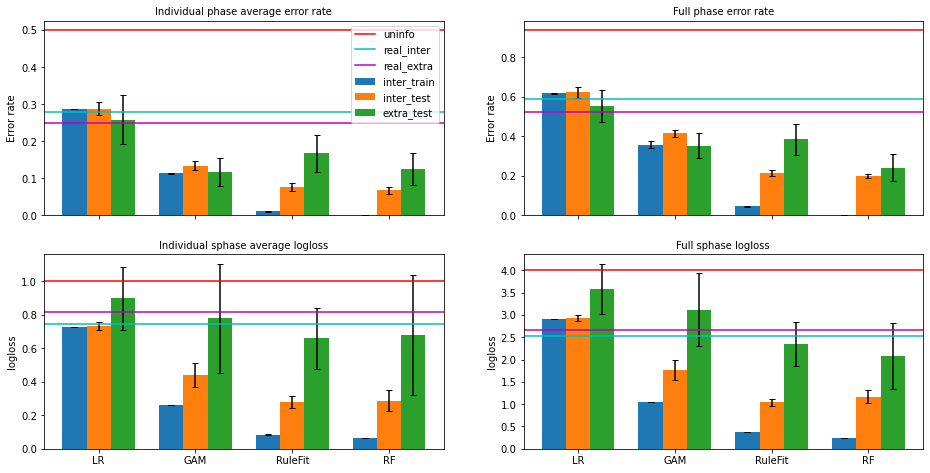

In [36]:
colors = ['r', 'c', 'm', 'y', 'b']
fig, ((ax2, ax1), (ax4, ax3)) = plt.subplots(2,2, sharey=False, sharex=True)
fig.set_size_inches(cm2inch(40, 20))

width = 0.25
fontsize = 10
ind = np.arange(len(df_extrafull))
ax1.bar(ind-width, df_interfull[f'mean_train_error'], width=width, label='inter_train', 
        yerr=df_interfull[f'std_train_error']/30**0.5, capsize=3.0)
ax1.bar(ind, df_interfull[f'mean_test_error'], width=width, label='inter_test',
        yerr=df_interfull[f'std_test_error']/30**0.5, capsize=3.0)
ax1.bar(ind+width, df_extrafull[f'mean_test_error'], width=width, label='extra_test',
        yerr=df_extrafull[f'std_test_error']/30**0.5, capsize=3.0)

# add base line
inter_error_base = [inter_full_uninfo_error, real_inter_full_info_error, real_extra_full_info_error]
inter_error_name = ['uninfo', 'real_inter', 'real_extra']
for i in range(len(inter_error_base)):
    ax1.axhline(y=inter_error_base[i], color=colors[i], linestyle='-', label=inter_error_name[i])

ax1.set_title('Full phase error rate', fontsize=fontsize)
ax1.set_xticks(ind)
ax1.set_xticklabels(df_extrafull.index, fontsize=fontsize)
ax1.set_ylabel('Error rate', fontsize=fontsize)

ax2.bar(ind-width, df_inter_average[f'mean_train_error'], width=width, label='inter_train', 
        yerr=df_inter_average[f'std_train_error']/30**0.5, capsize=3.0)
ax2.bar(ind, df_inter_average[f'mean_test_error'], width=width, label='inter_test',
        yerr=df_inter_average[f'std_test_error']/30**0.5, capsize=3.0)
ax2.bar(ind+width, df_extra_average[f'mean_test_error'], width=width, label='extra_test',
        yerr=df_extra_average[f'std_test_error']/30**0.5, capsize=3.0)

ax2.set_title('Individual phase average error rate', fontsize=fontsize)
ax2.set_xticks(ind)
ax2.set_ylabel('Error rate', fontsize=fontsize)
ax2.set_xticklabels(df_extrafull.index, fontsize=fontsize)

# add base line
avg_error_base = [inter_avg_uninfo_error, real_inter_avg_info_error, real_extra_avg_info_error]
avg_error_name = ['uninfo', 'real_inter', 'real_extra']
for i in range(len(avg_error_base)):
    ax2.axhline(y=avg_error_base[i], color=colors[i], linestyle='-', label=avg_error_name[i])

ax2.legend(fontsize=fontsize)

ax3.bar(ind-width, df_interfull[f'mean_train_log loss'], width=width, label='inter_train', 
        yerr=df_interfull[f'std_train_log loss']/30**0.5, capsize=3.0)
ax3.bar(ind, df_interfull[f'mean_test_log loss'], width=width, label='inter_test',
        yerr=df_interfull[f'std_test_log loss']/30**0.5, capsize=3.0)
ax3.bar(ind+width, df_extrafull[f'mean_test_log loss'], width=width, label='extra_test',
        yerr=df_extrafull[f'std_test_log loss']/30**0.5, capsize=3.0)

full_loss_base = [inter_full_uninfo_loss, real_inter_full_info_loss, real_extra_full_info_loss]
full_loss_name = ['uninfo', 'real_inter', 'real_extra']
for i in range(len(full_loss_base)):
    ax3.axhline(y=full_loss_base[i], color=colors[i], linestyle='-', label=full_loss_name[i])

ax3.set_title('Full sphase logloss', fontsize=fontsize)
ax3.set_xticks(ind)
ax3.set_xticklabels(df_extrafull.index, fontsize=fontsize)
ax3.set_ylabel('logloss', fontsize=fontsize)


ax4.bar(ind-width, df_inter_average[f'mean_train_log loss'], width=width, label='inter_train', 
        yerr=df_inter_average[f'std_train_log loss']/30**0.5, capsize=3.0)
ax4.bar(ind, df_inter_average[f'mean_test_log loss'], width=width, label='inter_test',
        yerr=df_inter_average[f'std_test_log loss']/30**0.5, capsize=3.0)
ax4.bar(ind+width, df_extra_average[f'mean_test_log loss'], width=width, label='extra_test',
        yerr=df_extra_average[f'std_test_log loss']/30**0.5, capsize=3.0)

avg_loss_base = [inter_avg_uninfo_loss, real_inter_avg_info_loss, real_extra_avg_info_loss]
avg_loss_name = ['uninfo', 'real_inter', 'real_extra']
for i in range(len(avg_loss_base)):
    ax4.axhline(y=avg_loss_base[i], color=colors[i], linestyle='-', label=avg_loss_name[i])

ax4.set_title('Individual sphase average logloss', fontsize=fontsize)
ax4.set_xticks(ind)
ax4.set_xticklabels(df_extrafull.index, fontsize=fontsize)
ax4.set_ylabel('logloss', fontsize=fontsize)

plt.show()

__Fix the Y scale 1__

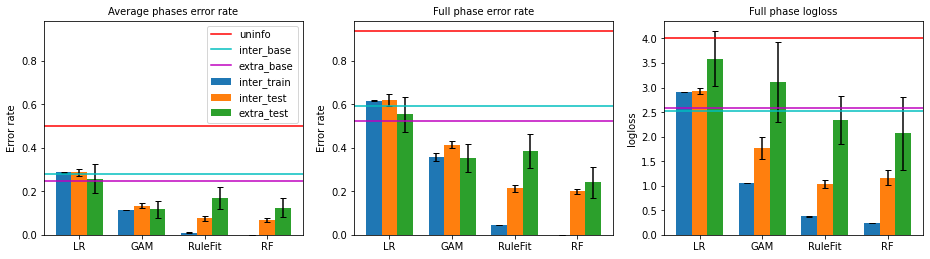

In [109]:
colors = ['r', 'c', 'm', 'y', 'b']
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, sharex=True)
fig.set_size_inches(cm2inch(40, 10))

width = 0.25
fontsize = 10
ind = np.arange(len(df_extrafull))

ax1.bar(ind-width, df_inter_average[f'mean_train_error'], width=width, label='inter_train', 
        yerr=df_inter_average[f'std_train_error']/30**0.5, capsize=3.0)
ax1.bar(ind, df_inter_average[f'mean_test_error'], width=width, label='inter_test',
        yerr=df_inter_average[f'std_test_error']/30**0.5, capsize=3.0)
ax1.bar(ind+width, df_extra_average[f'mean_test_error'], width=width, label='extra_test',
        yerr=df_extra_average[f'std_test_error']/30**0.5, capsize=3.0)

ax1.set_title('Average phases error rate', fontsize=fontsize)
ax1.set_xticks(ind)
ax1.set_ylabel('Error rate', fontsize=fontsize)
ax1.set_xticklabels(df_extrafull.index, fontsize=fontsize)

# add base line
avg_error_base = [inter_avg_uninfo_error, unreal_inter_avg_info_error, unreal_extra_avg_info_error]
avg_error_name = ['uninfo', 'inter_base', 'extra_base']
for i in range(len(avg_error_base)):
    ax1.axhline(y=avg_error_base[i], color=colors[i], linestyle='-', label=avg_error_name[i])

ax1.legend(fontsize=fontsize)
ax1.sharey(ax2) ########### here to share the y axis

ax2.bar(ind-width, df_interfull[f'mean_train_error'], width=width, label='inter_train', 
        yerr=df_interfull[f'std_train_error']/30**0.5, capsize=3.0)
ax2.bar(ind, df_interfull[f'mean_test_error'], width=width, label='inter_test',
        yerr=df_interfull[f'std_test_error']/30**0.5, capsize=3.0)
ax2.bar(ind+width, df_extrafull[f'mean_test_error'], width=width, label='extra_test',
        yerr=df_extrafull[f'std_test_error']/30**0.5, capsize=3.0)

# add base line
inter_error_base = [inter_full_uninfo_error, unreal_inter_full_info_error, unreal_extra_full_info_error]
inter_error_name = ['uninfo', 'inter_base', 'extra_base']
for i in range(len(inter_error_base)):
    ax2.axhline(y=inter_error_base[i], color=colors[i], linestyle='-', label=inter_error_name[i])

ax2.set_title('Full phase error rate', fontsize=fontsize)
ax2.set_xticks(ind)
ax2.set_xticklabels(df_extrafull.index, fontsize=fontsize)
ax2.set_ylabel('Error rate', fontsize=fontsize)

ax3.bar(ind-width, df_interfull[f'mean_train_log loss'], width=width, label='inter_train', 
        yerr=df_interfull[f'std_train_log loss']/30**0.5, capsize=3.0)
ax3.bar(ind, df_interfull[f'mean_test_log loss'], width=width, label='inter_test',
        yerr=df_interfull[f'std_test_log loss']/30**0.5, capsize=3.0)
ax3.bar(ind+width, df_extrafull[f'mean_test_log loss'], width=width, label='extra_test',
        yerr=df_extrafull[f'std_test_log loss']/30**0.5, capsize=3.0)

full_loss_base = [inter_full_uninfo_loss, unreal_inter_full_info_loss, unreal_extra_full_info_loss]
full_loss_name = ['uninfo', 'inter_base', 'extra_base']
for i in range(len(full_loss_base)):
    ax3.axhline(y=full_loss_base[i], color=colors[i], linestyle='-', label=full_loss_name[i])

ax3.set_title('Full phase logloss', fontsize=fontsize)
ax3.set_xticks(ind)
ax3.set_xticklabels(df_extrafull.index, fontsize=fontsize)
ax3.set_ylabel('logloss', fontsize=fontsize)

plt.show()

__Fix the Y scale__

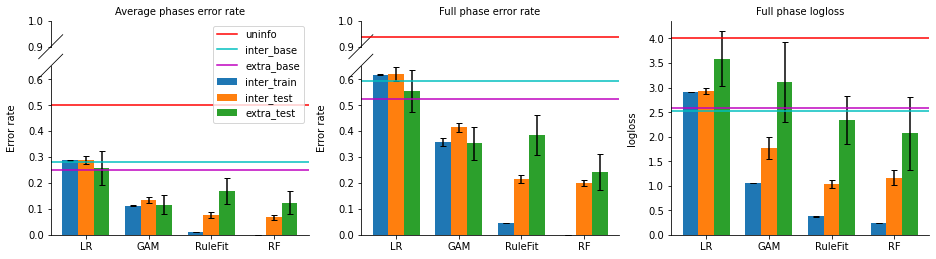

In [104]:
# To run this, first run first comment
# !pip install brokenaxes 
from brokenaxes import brokenaxes
from matplotlib.gridspec import GridSpec

colors = ['r', 'c', 'm', 'y', 'b']
sps1, sps2, sps3 = GridSpec(1,3)
fig = plt.figure()
fig.set_size_inches(cm2inch(40, 10))
break_ylims = ((0, .65), (.9, 1))

# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, sharex=True)
# fig.set_size_inches(cm2inch(40, 10))

width = 0.25
fontsize = 10
ind = np.arange(len(df_extrafull))

bax1 = brokenaxes(ylims=break_ylims, subplot_spec=sps1)
bax1.bar(ind-width, df_inter_average[f'mean_train_error'], width=width, label='inter_train', 
        yerr=df_inter_average[f'std_train_error']/30**0.5, capsize=3.0)
bax1.bar(ind, df_inter_average[f'mean_test_error'], width=width, label='inter_test',
        yerr=df_inter_average[f'std_test_error']/30**0.5, capsize=3.0)
bax1.bar(ind+width, df_extra_average[f'mean_test_error'], width=width, label='extra_test',
        yerr=df_extra_average[f'std_test_error']/30**0.5, capsize=3.0)

bax1.set_title('Average phases error rate', fontsize=fontsize)
bax1.set_xticks(np.arange(len(df_extrafull.index)))
bax1.set_ylabel('Error rate', fontsize=fontsize)
bax1.set_xticklabels(['None', 'LR', 'GAM', 'RuleFit', 'RF'], fontsize=fontsize)

# add base line
avg_error_base = [inter_avg_uninfo_error, unreal_inter_avg_info_error, unreal_extra_avg_info_error]
avg_error_name = ['uninfo', 'inter_base', 'extra_base']
for i in range(len(avg_error_base)):
    bax1.axhline(y=avg_error_base[i], color=colors[i], linestyle='-', label=avg_error_name[i])

bax1.legend(fontsize=fontsize)

bax2 = brokenaxes(ylims=break_ylims, subplot_spec=sps2)

bax2.bar(ind-width, df_interfull[f'mean_train_error'], width=width, label='inter_train', 
        yerr=df_interfull[f'std_train_error']/30**0.5, capsize=3.0)
bax2.bar(ind, df_interfull[f'mean_test_error'], width=width, label='inter_test',
        yerr=df_interfull[f'std_test_error']/30**0.5, capsize=3.0)
bax2.bar(ind+width, df_extrafull[f'mean_test_error'], width=width, label='extra_test',
        yerr=df_extrafull[f'std_test_error']/30**0.5, capsize=3.0)

# add base line
inter_error_base = [inter_full_uninfo_error, unreal_inter_full_info_error, unreal_extra_full_info_error]
inter_error_name = ['uninfo', 'inter_base', 'extra_base']
for i in range(len(inter_error_base)):
    bax2.axhline(y=inter_error_base[i], color=colors[i], linestyle='-', label=inter_error_name[i])

bax2.set_title('Full phase error rate', fontsize=fontsize)
bax2.set_xticklabels(['None', 'LR', 'GAM', 'RuleFit', 'RF'], fontsize=fontsize)
bax2.set_ylabel('Error rate', fontsize=fontsize)


bax3 = brokenaxes(subplot_spec=sps3)

bax3.bar(ind-width, df_interfull[f'mean_train_log loss'], width=width, label='inter_train', 
        yerr=df_interfull[f'std_train_log loss']/30**0.5, capsize=3.0)
bax3.bar(ind, df_interfull[f'mean_test_log loss'], width=width, label='inter_test',
        yerr=df_interfull[f'std_test_log loss']/30**0.5, capsize=3.0)
bax3.bar(ind+width, df_extrafull[f'mean_test_log loss'], width=width, label='extra_test',
        yerr=df_extrafull[f'std_test_log loss']/30**0.5, capsize=3.0)

full_loss_base = [inter_full_uninfo_loss, unreal_inter_full_info_loss, unreal_extra_full_info_loss]
full_loss_name = ['uninfo', 'inter_base', 'extra_base']
for i in range(len(full_loss_base)):
    bax3.axhline(y=full_loss_base[i], color=colors[i], linestyle='-', label=full_loss_name[i])

bax3.set_title('Full phase logloss', fontsize=fontsize)
bax3.set_xticklabels(['None', 'LR', 'GAM', 'RuleFit', 'RF'], fontsize=fontsize)
bax3.set_ylabel('logloss', fontsize=fontsize)

plt.show()

__Remove the extrapolation baseline__

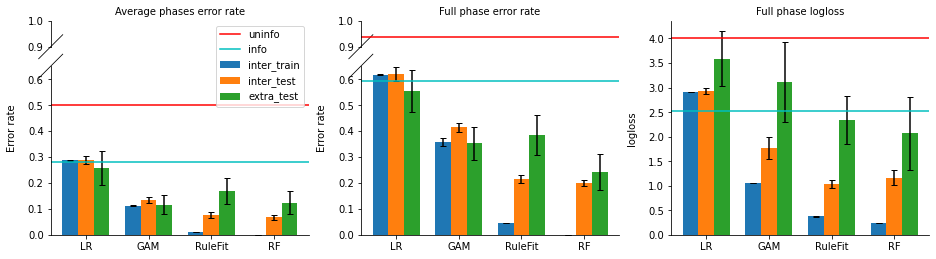

In [113]:
# To run this, first run first comment
# !pip install brokenaxes 
from brokenaxes import brokenaxes
from matplotlib.gridspec import GridSpec

colors = ['r', 'c', 'm', 'y', 'b']
sps1, sps2, sps3 = GridSpec(1,3)
fig = plt.figure()
fig.set_size_inches(cm2inch(40, 10))
break_ylims = ((0, .65), (.9, 1))

# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, sharex=True)
# fig.set_size_inches(cm2inch(40, 10))

width = 0.25
fontsize = 10
ind = np.arange(len(df_extrafull))

bax1 = brokenaxes(ylims=break_ylims, subplot_spec=sps1)
bax1.bar(ind-width, df_inter_average[f'mean_train_error'], width=width, label='inter_train', 
        yerr=df_inter_average[f'std_train_error']/30**0.5, capsize=3.0)
bax1.bar(ind, df_inter_average[f'mean_test_error'], width=width, label='inter_test',
        yerr=df_inter_average[f'std_test_error']/30**0.5, capsize=3.0)
bax1.bar(ind+width, df_extra_average[f'mean_test_error'], width=width, label='extra_test',
        yerr=df_extra_average[f'std_test_error']/30**0.5, capsize=3.0)

bax1.set_title('Average phases error rate', fontsize=fontsize)
bax1.set_xticks(np.arange(len(df_extrafull.index)))
bax1.set_ylabel('Error rate', fontsize=fontsize)
bax1.set_xticklabels(['None', 'LR', 'GAM', 'RuleFit', 'RF'], fontsize=fontsize)

# add base line
avg_error_base = [inter_avg_uninfo_error, unreal_inter_avg_info_error]
avg_error_name = ['uninfo', 'info']
for i in range(len(avg_error_base)):
    bax1.axhline(y=avg_error_base[i], color=colors[i], linestyle='-', label=avg_error_name[i])

bax1.legend(fontsize=fontsize)

bax2 = brokenaxes(ylims=break_ylims, subplot_spec=sps2)

bax2.bar(ind-width, df_interfull[f'mean_train_error'], width=width, label='inter_train', 
        yerr=df_interfull[f'std_train_error']/30**0.5, capsize=3.0)
bax2.bar(ind, df_interfull[f'mean_test_error'], width=width, label='inter_test',
        yerr=df_interfull[f'std_test_error']/30**0.5, capsize=3.0)
bax2.bar(ind+width, df_extrafull[f'mean_test_error'], width=width, label='extra_test',
        yerr=df_extrafull[f'std_test_error']/30**0.5, capsize=3.0)

# add base line
inter_error_base = [inter_full_uninfo_error, unreal_inter_full_info_error]
inter_error_name = ['uninfo', 'info']
for i in range(len(inter_error_base)):
    bax2.axhline(y=inter_error_base[i], color=colors[i], linestyle='-', label=inter_error_name[i])

bax2.set_title('Full phase error rate', fontsize=fontsize)
bax2.set_xticklabels(['None', 'LR', 'GAM', 'RuleFit', 'RF'], fontsize=fontsize)
bax2.set_ylabel('Error rate', fontsize=fontsize)


bax3 = brokenaxes(subplot_spec=sps3)

bax3.bar(ind-width, df_interfull[f'mean_train_log loss'], width=width, label='inter_train', 
        yerr=df_interfull[f'std_train_log loss']/30**0.5, capsize=3.0)
bax3.bar(ind, df_interfull[f'mean_test_log loss'], width=width, label='inter_test',
        yerr=df_interfull[f'std_test_log loss']/30**0.5, capsize=3.0)
bax3.bar(ind+width, df_extrafull[f'mean_test_log loss'], width=width, label='extra_test',
        yerr=df_extrafull[f'std_test_log loss']/30**0.5, capsize=3.0)

full_loss_base = [inter_full_uninfo_loss, unreal_inter_full_info_loss]
full_loss_name = ['uninfo', 'info']
for i in range(len(full_loss_base)):
    bax3.axhline(y=full_loss_base[i], color=colors[i], linestyle='-', label=full_loss_name[i])

bax3.set_title('Full phase logloss', fontsize=fontsize)
bax3.set_xticklabels(['None', 'LR', 'GAM', 'RuleFit', 'RF'], fontsize=fontsize)
bax3.set_ylabel('logloss', fontsize=fontsize)

plt.show()